# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
import openweathermapy.core as ow
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# L# Get random longitude
lon = np.random.uniform (low=-1.8, high=1.8, size=(2000)) * 100

# Get random Latitude
lat = np.random.uniform (low=-0.9, high=0.9, size=(2000)) * 100

# Combine random latitude and longitude coordinates
coordinates = np.stack((lat, lon), axis=-1)


In [3]:
# Create cities data frame
cities_raw = []
for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    cities_raw.append(citipy.nearest_city(lat, lon))
    
dup_items = set()
cities = []
for x in cities_raw:
    if x not in dup_items:
        cities.append(x)
        dup_items.add(x)
    
print(len(cities))

766


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# set up lists to hold reponse info
ow_date = []
ow_city = []
ow_country = []
ow_cloud = []
ow_humid = []
ow_lat = []
ow_lon = []
ow_maxtmp = []
ow_wind = []

x = 1
    
# Build query URL
for city in cities:
    
   
    name = city.city_name
    print("Retreiving data for City #"+ str(x) + " of " + str((len(cities))) + " ... "  + name )
    
    query_url = url + "appid=" + api_key + "&q=" + name + "&units=" + units
    print(query_url)
    print(50 * "-")
    
    # Get weather data
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
   
    # Catch wrong city name exception
    try:
   
        ow_date.append(weather_json['dt'])
        ow_city.append(weather_json['name'])
        ow_country.append(weather_json['sys']['country'])
        ow_lat.append(weather_json['coord']['lat'])
        ow_lon.append(weather_json['coord']['lon'])
        ow_maxtmp.append(weather_json['main']['temp_max'])
        ow_humid.append(weather_json['main']['humidity'])
        ow_cloud.append(weather_json['clouds']['all'])
        ow_wind.append(weather_json['wind']['speed'])
        
        x = x + 1
            
    except:
             print("Oops! That was a wrong city name. Try again...")
             print(50 * "-")
            
   
    # Timer to pause for a second after each record - not too exceed 60 API calls per minute limit
    time.sleep(1)


Retreiving data for City #1 of 766 ... skiros
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=skiros&units=Imperial
--------------------------------------------------
Oops! That was a wrong city name. Try again...
--------------------------------------------------
Retreiving data for City #1 of 766 ... mataura
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=mataura&units=Imperial
--------------------------------------------------
Retreiving data for City #2 of 766 ... east london
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=east london&units=Imperial
--------------------------------------------------
Retreiving data for City #3 of 766 ... bosconia
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=bosconia&units=Imperial
--------------------------------------------------
Retreiving data for City #4 of 766 ... talnakh
http://api.

Retreiving data for City #33 of 766 ... hilo
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=hilo&units=Imperial
--------------------------------------------------
Retreiving data for City #34 of 766 ... belushya guba
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=belushya guba&units=Imperial
--------------------------------------------------
Oops! That was a wrong city name. Try again...
--------------------------------------------------
Retreiving data for City #34 of 766 ... bosaso
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=bosaso&units=Imperial
--------------------------------------------------
Retreiving data for City #35 of 766 ... prince rupert
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=prince rupert&units=Imperial
--------------------------------------------------
Retreiving data for City #36 of 766 ... chumik

Retreiving data for City #65 of 766 ... kahului
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=kahului&units=Imperial
--------------------------------------------------
Retreiving data for City #66 of 766 ... new norfolk
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=new norfolk&units=Imperial
--------------------------------------------------
Retreiving data for City #67 of 766 ... filadelfia
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=filadelfia&units=Imperial
--------------------------------------------------
Retreiving data for City #68 of 766 ... mahibadhoo
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=mahibadhoo&units=Imperial
--------------------------------------------------
Retreiving data for City #69 of 766 ... ovalle
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=ovall

Retreiving data for City #99 of 766 ... douglas
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=douglas&units=Imperial
--------------------------------------------------
Retreiving data for City #100 of 766 ... port alfred
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=port alfred&units=Imperial
--------------------------------------------------
Retreiving data for City #101 of 766 ... ponta do sol
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=ponta do sol&units=Imperial
--------------------------------------------------
Retreiving data for City #102 of 766 ... yellowknife
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=yellowknife&units=Imperial
--------------------------------------------------
Retreiving data for City #103 of 766 ... norman wells
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f88

Oops! That was a wrong city name. Try again...
--------------------------------------------------
Retreiving data for City #132 of 766 ... sao filipe
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=sao filipe&units=Imperial
--------------------------------------------------
Retreiving data for City #133 of 766 ... dunedin
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=dunedin&units=Imperial
--------------------------------------------------
Retreiving data for City #134 of 766 ... torbay
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=torbay&units=Imperial
--------------------------------------------------
Retreiving data for City #135 of 766 ... sibolga
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=sibolga&units=Imperial
--------------------------------------------------
Retreiving data for City #136 of 766 ... rakvice
http:

Retreiving data for City #162 of 766 ... saint george
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=saint george&units=Imperial
--------------------------------------------------
Retreiving data for City #163 of 766 ... mehamn
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=mehamn&units=Imperial
--------------------------------------------------
Retreiving data for City #164 of 766 ... los llanos de aridane
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=los llanos de aridane&units=Imperial
--------------------------------------------------
Retreiving data for City #165 of 766 ... bethel
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=bethel&units=Imperial
--------------------------------------------------
Retreiving data for City #166 of 766 ... barrow
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6

Retreiving data for City #198 of 766 ... baiao
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=baiao&units=Imperial
--------------------------------------------------
Retreiving data for City #199 of 766 ... aklavik
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=aklavik&units=Imperial
--------------------------------------------------
Retreiving data for City #200 of 766 ... manzanillo
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=manzanillo&units=Imperial
--------------------------------------------------
Retreiving data for City #201 of 766 ... sinnamary
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=sinnamary&units=Imperial
--------------------------------------------------
Retreiving data for City #202 of 766 ... goya
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=goya&units=Imper

Retreiving data for City #231 of 766 ... nizwa
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=nizwa&units=Imperial
--------------------------------------------------
Retreiving data for City #232 of 766 ... balaipungut
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=balaipungut&units=Imperial
--------------------------------------------------
Retreiving data for City #233 of 766 ... port hardy
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=port hardy&units=Imperial
--------------------------------------------------
Retreiving data for City #234 of 766 ... mount gambier
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=mount gambier&units=Imperial
--------------------------------------------------
Retreiving data for City #235 of 766 ... carnarvon
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f8

Retreiving data for City #264 of 766 ... lolua
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=lolua&units=Imperial
--------------------------------------------------
Oops! That was a wrong city name. Try again...
--------------------------------------------------
Retreiving data for City #264 of 766 ... puerto ayora
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=puerto ayora&units=Imperial
--------------------------------------------------
Retreiving data for City #265 of 766 ... mahina
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=mahina&units=Imperial
--------------------------------------------------
Retreiving data for City #266 of 766 ... alice springs
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=alice springs&units=Imperial
--------------------------------------------------
Retreiving data for City #267 of 766 ... r

Retreiving data for City #294 of 766 ... resistencia
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=resistencia&units=Imperial
--------------------------------------------------
Retreiving data for City #295 of 766 ... urumqi
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=urumqi&units=Imperial
--------------------------------------------------
Oops! That was a wrong city name. Try again...
--------------------------------------------------
Retreiving data for City #295 of 766 ... naze
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=naze&units=Imperial
--------------------------------------------------
Retreiving data for City #296 of 766 ... peterhead
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=peterhead&units=Imperial
--------------------------------------------------
Retreiving data for City #297 of 766 ... sao domingos 

Retreiving data for City #327 of 766 ... vestbygda
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=vestbygda&units=Imperial
--------------------------------------------------
Oops! That was a wrong city name. Try again...
--------------------------------------------------
Retreiving data for City #327 of 766 ... takoradi
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=takoradi&units=Imperial
--------------------------------------------------
Retreiving data for City #328 of 766 ... upernavik
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=upernavik&units=Imperial
--------------------------------------------------
Retreiving data for City #329 of 766 ... winder
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=winder&units=Imperial
--------------------------------------------------
Retreiving data for City #330 of 766 ... ilulissat

Retreiving data for City #362 of 766 ... kuandian
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=kuandian&units=Imperial
--------------------------------------------------
Retreiving data for City #363 of 766 ... vanimo
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=vanimo&units=Imperial
--------------------------------------------------
Retreiving data for City #364 of 766 ... luba
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=luba&units=Imperial
--------------------------------------------------
Retreiving data for City #365 of 766 ... mata
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=mata&units=Imperial
--------------------------------------------------
Retreiving data for City #366 of 766 ... chifeng
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=chifeng&units=Imperial
--------

Retreiving data for City #395 of 766 ... russell
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=russell&units=Imperial
--------------------------------------------------
Retreiving data for City #396 of 766 ... teluknaga
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=teluknaga&units=Imperial
--------------------------------------------------
Retreiving data for City #397 of 766 ... guelengdeng
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=guelengdeng&units=Imperial
--------------------------------------------------
Oops! That was a wrong city name. Try again...
--------------------------------------------------
Retreiving data for City #397 of 766 ... srednekolymsk
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=srednekolymsk&units=Imperial
--------------------------------------------------
Retreiving data for City #398 of 7

Retreiving data for City #422 of 766 ... candesti
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=candesti&units=Imperial
--------------------------------------------------
Oops! That was a wrong city name. Try again...
--------------------------------------------------
Retreiving data for City #422 of 766 ... sandwick
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=sandwick&units=Imperial
--------------------------------------------------
Retreiving data for City #423 of 766 ... songkhla
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=songkhla&units=Imperial
--------------------------------------------------
Retreiving data for City #424 of 766 ... zakamensk
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=zakamensk&units=Imperial
--------------------------------------------------
Retreiving data for City #425 of 766 ... nhulunb

Retreiving data for City #458 of 766 ... saint anthony
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=saint anthony&units=Imperial
--------------------------------------------------
Retreiving data for City #459 of 766 ... nosy varika
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=nosy varika&units=Imperial
--------------------------------------------------
Retreiving data for City #460 of 766 ... leh
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=leh&units=Imperial
--------------------------------------------------
Retreiving data for City #461 of 766 ... umzimvubu
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=umzimvubu&units=Imperial
--------------------------------------------------
Oops! That was a wrong city name. Try again...
--------------------------------------------------
Retreiving data for City #461 of 766 ... p

Retreiving data for City #490 of 766 ... praia
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=praia&units=Imperial
--------------------------------------------------
Retreiving data for City #491 of 766 ... nipawin
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=nipawin&units=Imperial
--------------------------------------------------
Retreiving data for City #492 of 766 ... girona
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=girona&units=Imperial
--------------------------------------------------
Retreiving data for City #493 of 766 ... hofn
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=hofn&units=Imperial
--------------------------------------------------
Retreiving data for City #494 of 766 ... byron bay
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=byron bay&units=Imperial
----

Retreiving data for City #524 of 766 ... hami
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=hami&units=Imperial
--------------------------------------------------
Retreiving data for City #525 of 766 ... sabang
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=sabang&units=Imperial
--------------------------------------------------
Retreiving data for City #526 of 766 ... navahrudak
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=navahrudak&units=Imperial
--------------------------------------------------
Retreiving data for City #527 of 766 ... brainerd
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=brainerd&units=Imperial
--------------------------------------------------
Retreiving data for City #528 of 766 ... westonaria
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=westonaria&units

Retreiving data for City #560 of 766 ... ipixuna
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=ipixuna&units=Imperial
--------------------------------------------------
Retreiving data for City #561 of 766 ... trancoso
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=trancoso&units=Imperial
--------------------------------------------------
Retreiving data for City #562 of 766 ... neropolis
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=neropolis&units=Imperial
--------------------------------------------------
Retreiving data for City #563 of 766 ... podgornoye
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=podgornoye&units=Imperial
--------------------------------------------------
Retreiving data for City #564 of 766 ... beloha
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=beloha&u

Retreiving data for City #592 of 766 ... okhotsk
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=okhotsk&units=Imperial
--------------------------------------------------
Retreiving data for City #593 of 766 ... ancud
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=ancud&units=Imperial
--------------------------------------------------
Retreiving data for City #594 of 766 ... brownwood
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=brownwood&units=Imperial
--------------------------------------------------
Retreiving data for City #595 of 766 ... barawe
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=barawe&units=Imperial
--------------------------------------------------
Oops! That was a wrong city name. Try again...
--------------------------------------------------
Retreiving data for City #595 of 766 ... waipawa
http://api.

Retreiving data for City #624 of 766 ... namtsy
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=namtsy&units=Imperial
--------------------------------------------------
Retreiving data for City #625 of 766 ... belawan
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=belawan&units=Imperial
--------------------------------------------------
Retreiving data for City #626 of 766 ... georgetown
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=georgetown&units=Imperial
--------------------------------------------------
Retreiving data for City #627 of 766 ... tahta
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=tahta&units=Imperial
--------------------------------------------------
Oops! That was a wrong city name. Try again...
--------------------------------------------------
Retreiving data for City #627 of 766 ... shuiji
http://api

Retreiving data for City #654 of 766 ... archidona
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=archidona&units=Imperial
--------------------------------------------------
Retreiving data for City #655 of 766 ... hobyo
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=hobyo&units=Imperial
--------------------------------------------------
Retreiving data for City #656 of 766 ... palabuhanratu
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=palabuhanratu&units=Imperial
--------------------------------------------------
Oops! That was a wrong city name. Try again...
--------------------------------------------------
Retreiving data for City #656 of 766 ... aranos
http://api.openweathermap.org/data/2.5/weather?appid=16268bcfd5489f25d72b6f887292f84a&q=aranos&units=Imperial
--------------------------------------------------
Retreiving data for City #657 of 766 ... alofi
h

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# create a data frame from retreived weather data
weather_dict = {
    "Date": ow_date,
    "City": ow_city,
    "Country": ow_country,
    "Latitude": ow_lat,
    "Longitude": ow_lon,
    "MaxTemp": ow_maxtmp,
    "Humidity": ow_humid,
    "Cloudiness": ow_cloud,
    "Wind Speed": ow_wind
}


weather_data = pd.DataFrame(weather_dict)

# Remove duplicates
weather_data = weather_data.drop_duplicates(["City"], keep ='first')

weather_data.head(10)

,Date,City,Country,Latitude,Longitude,MaxTemp,Humidity,Cloudiness,Wind Speed
0,1573333427,Mataura,NZ,-46.19,168.86,48.99,90,100,7.00
1,1573333447,East London,ZA,-33.02,27.91,66.34,81,100,17.02
2,1573333567,Bosconia,CO,9.97,-73.89,87.48,68,66,5.48
3,1573333568,Talnakh,RU,69.49,88.39,-14.81,75,97,11.18
4,1573333572,Qaanaaq,GL,77.48,-69.36,-5.27,45,0,5.37
5,1573333353,Busselton,AU,-33.64,115.35,66.00,65,5,15.82
6,1573333574,Jablah,SY,35.36,35.93,75.20,27,68,4.70
7,1573333473,Provideniya,RU,64.42,-173.23,33.94,99,100,3.00
8,1573333576,Berlevag,NO,70.86,29.09,31.59,74,100,7.49
9,1573333579,Jamestown,AU,-33.21,138.60,47.52,83,0,2.80


In [6]:
weather_data.count()

Date          671
City          671
Country       671
Latitude      671
Longitude     671
MaxTemp       671
Humidity      671
Cloudiness    671
Wind Speed    671
dtype: int64

In [7]:
# Save csv file
weather_data.to_csv("Weather_Data.csv", index=False)

In [8]:
# Convert Unix Time Stamp to regular date
tmpDate = datetime.datetime.fromtimestamp(int(weather_data["Date"][0])).strftime('%Y-%m-%d')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

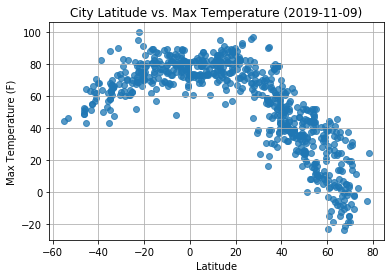

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"],weather_data["MaxTemp"], marker="o", alpha = 0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (" + tmpDate + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("../Images/MaxTmp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

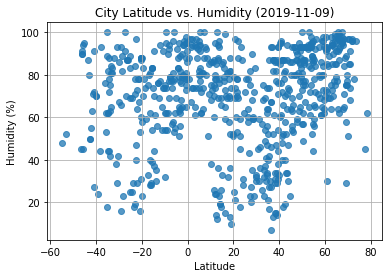

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"],weather_data["Humidity"], marker="o", alpha = 0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (" + tmpDate + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../Images/Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

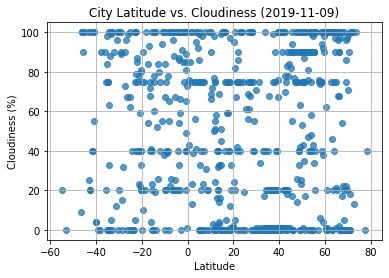

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"],weather_data["Cloudiness"], marker="o", alpha = 0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (" + tmpDate + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../Images/Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

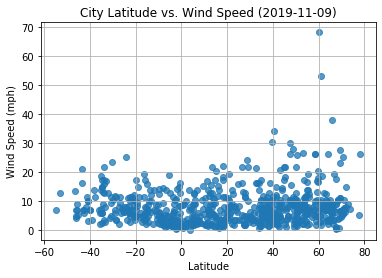

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"],weather_data["Wind Speed"], marker="o", alpha = 0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (" + tmpDate + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("../Images/WindSpeed.png")

# Show plot
plt.show()